In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [3]:

nlines=11
rainbow=cmap=plt.get_cmap('rainbow')
line_colors = cmap(np.linspace(0,1,nlines))

In [3]:
def SIS_SI(INP,t):  

    Y=np.zeros((4))
    V = INP   
    #susceptible hosts
    Y[0] = nu[0] - V[0] * r * (beta[0][1]*V[3]) - mu[0] * V[0] 
    #susceptible mosquitos
    Y[1] = nu[1] - V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[1]
    #infected hosts
    Y[2] = V[0] * r * (beta[0][1]*V[3]) - gamma[0] * V[2] - mu[0] * V[2]
    #infected mosquitos
    Y[3] = V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[3]
    

    return Y

In [4]:
r=0.5/1e3;
beta=np.array([[0, 0.5], [0.8, 0]]);
gamma=np.array([0.033, 0]);
mu=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
X0=np.array([1e3, 1e4]);
Y0=np.array([1, 1]);
ND=MaxTime=1000.0;
TS=1.0

INPUT=np.hstack((X0,Y0))


t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(SIS_SI,INPUT,t_range)

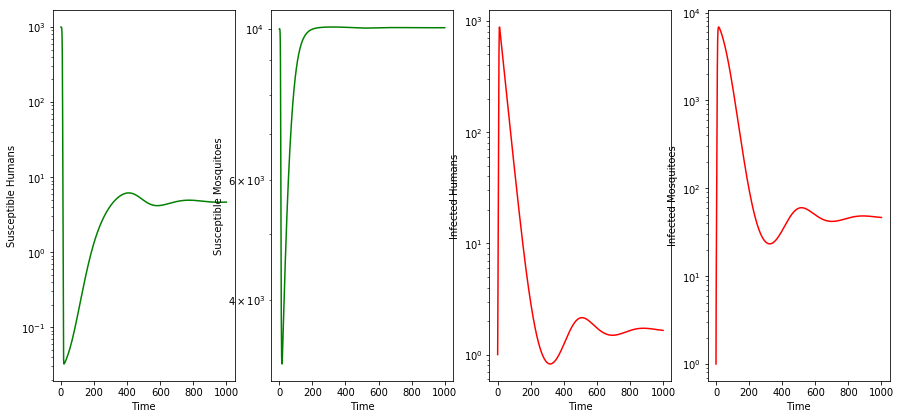

In [5]:
plt.figure(figsize=(15,15))
plt.subplot(241)
plt.semilogy(RES[:,0], 'g', label='SH')
plt.xlabel('Time')
plt.ylabel('Susceptible Humans')
plt.subplot(242)
plt.semilogy(RES[:,1], 'g', label='SM')
plt.xlabel('Time')
plt.ylabel('Susceptible Mosquitoes')
plt.subplot(243)
plt.semilogy(RES[:,2], 'r', label='IH')
plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.subplot(244)
plt.semilogy(RES[:,3], 'r', label='IM')
pl.xlabel('Time')
pl.ylabel('Infected Mosquitoes')
plt.show()

In [6]:
def SIS_SI_mut(INP,t):  

    Y=np.zeros((6))
    V = INP   
    #susceptible hosts
    Y[0] = nu[0]*(N/1e3) - V[0] * r * (beta[0][1]*V[5]) - d[0] * V[0] + gamma[0] * V[3]
    
    #susceptible hosts w mutation
    Y[1] = nu[0]*(mutants/1e3) - V[1] * r * (beta[0][1]*V[5]) - d[0]* V[1] + gamma[2] * V[4]
    
    #susceptible mosquitos
    Y[2] = nu[1] - (V[2] * r * (beta[1][0]*V[3]) + V[2] * r * (beta[1][1]*V[4]) ) - d[1] * V[2]
    
    #infected hosts
    Y[3] = V[0] * r * (beta[0][1]*V[5]) - gamma[0] * V[3] - d[0] * V[3]
    
    #infected hosts w mutation
    Y[4] = V[1] * r * (beta[0][1]*V[5]) - gamma[2] * V[4] - d[0] * V[4]
    
    #infected mosquitos
    Y[5] = V[2] * r * (beta[1][0]*V[3])+ V[2] * r * (beta[1][1]*V[4]) - d[1] * V[5]
    
       
    return Y


In [7]:
mut_recovery=np.linspace(0.0165,0.033,5)
RES_recovery=np.zeros((1001,6,5))

r=0.5/1e3;
mutants=100
N=900
beta=np.array([[0, 0.2], [0.5, 0.5]]);
d=np.array([5.5e-5, 0.025]);
nu=np.array([5.5e-2, 2.5e2]);


for i in range(5):
    X0=np.array([1e3-mutants,mutants, 1e4]);
    Y0=np.array([1,0, 1]);
    ND=MaxTime=1000.0;
    TS=1.0
    
    INPUT=np.hstack((X0,Y0))
    gamma=np.array([0.033, 0,mut_recovery[i]]);
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SIS_SI_mut,INPUT,t_range)
    RES_recovery[:,:,i]=RES_mut

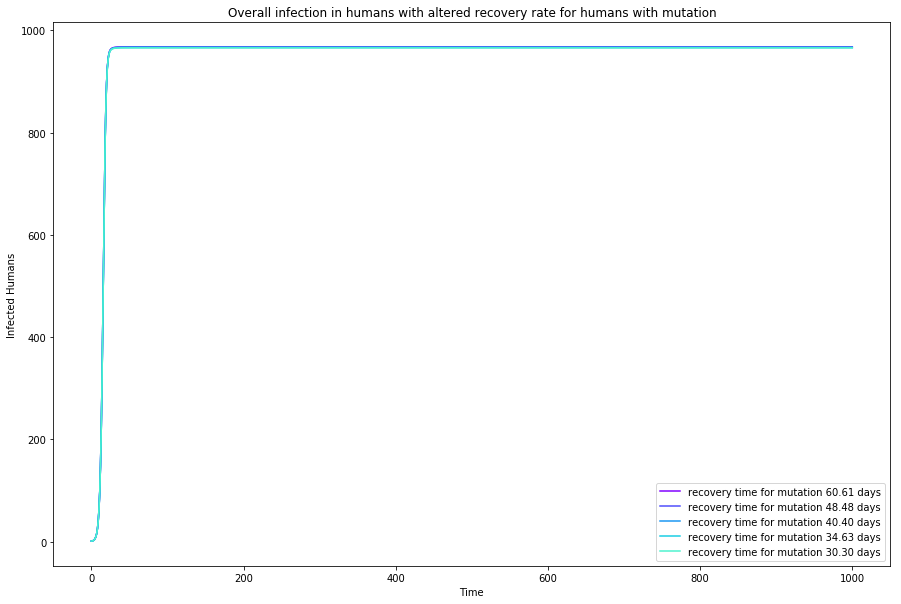

In [8]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_recovery[:,3,i]+RES_recovery[:,4,i], c=line_colors[i], label='recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall infection in humans with altered recovery rate for humans with mutation')

plt.legend()
plt.show()

# SEIS-SEI

In [71]:
def SEIS_SEI(INP,t):  

    Y=np.zeros((6))
    V = INP 

    #susceptible hosts
    Y[0] = nu[0] - V[0] * (0.5/1e3) * (beta[0][1]*V[5]) - d[0] * V[0] +gamma[0] * V[4]
    

    
    #susceptible mosquitos
    Y[1] = nu[1] - V[1] * (0.5/1e4)* (beta[1][0]*V[4])  - d[1] * V[1]
    
    #exposed hosts
    
    Y[2]= V[0] * (0.5/1e3)* (beta[0][1]*V[5]) -sigma[0]*V[2]- d[0]*V[2]
    

    
    #exposed mosquitos
    
    Y[3]= V[1] * (0.5/1e4)* (beta[1][0]*V[4]) -sigma[1]*V[3]- d[1]*V[3]
    
    #infected hosts
    Y[4] = sigma[0]*V[2] - gamma[0] * V[4] - d[0] * V[4]
    

    
    #infected mosquitos
    Y[5] = sigma[1]*V[3] - d[1] * V[5]
    
    return Y

In [78]:
RES_0=np.zeros((1001,6))
beta=np.array([[0, 0.2], [0.5, 0.5]]);
sigma=np.array([0.05,0.143])
d=np.array([5.5e-5, 0.05]);
nu=np.array([5.5e-2, 5e2])
gamma=np.array([0.033, 0]);
X0=np.array([1e3, 1e4]);
Y0=np.array([0,0,1, 1]);
ND=MaxTime=1000.0;
TS=1.0

INPUT=np.hstack((X0,Y0))
  
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES_mut = spi.odeint(SEIS_SEI,INPUT,t_range)
RES_0[:,:]=RES_mut

In [5]:
def SEIS_SI_mut(INP,t):  

    Y=np.zeros((9))
    V = INP 
    N=np.zeros(2)
    for i in range(2):
        N[i]=V[i]+V[i+3]+V[i+6]
    #susceptible hosts
    Y[0] = nu[0]*(Num/1e3) - V[0] * (r/1e3) * (beta[0][1]*V[8]) - d[0] * V[0] +gamma[0] * V[6]
    
    #susceptible hosts w mutation
    Y[1] = nu[0]*(mutants/1e3) - V[1] * (r/1e3) * (beta[0][1]*V[8]) - d[0] * V[1] + gamma[2] * V[7]
    
    #susceptible mosquitos
    Y[2] = nu[1] - (V[2] * (r/1e3)* (beta[1][0]*V[6]) + V[2] * (r/1e3) * (beta[1][1]*V[7])) - d[1] * V[2]
    
    #exposed hosts
    
    Y[3]= V[0] * (r/1e3)* (beta[0][1]*V[8]) -sigma[0]*V[3]- d[0]*V[3]
    
    #exposed hosts w mutation
    
    Y[4] = V[1] * (r/(1e3)) * (beta[0][1]*V[8]) -sigma[0]*V[4]- d[0]*V[4]
    
    #exposed mosquitos
    
    Y[5]=V[2] * (r/1e3) * (beta[1][0]*V[6]) + V[2] * (r/1e3) * (beta[1][1]*V[7]) -sigma[1]*V[5]- d[1]*V[5]
    
    #infected hosts
    Y[6] = sigma[0]*V[3] - gamma[0] * V[6] - d[0] * V[6]
    
    #infected hosts w mutation
    Y[7] = sigma[0]*V[4] - gamma[2] * V[7] - d[0] * V[7]
    
    #infected mosquitos
    Y[8] = sigma[1]*V[5] - d[1] * V[8]
    
       
    return Y

In [10]:
mut_recovery=np.linspace(0.0165,0.033,5)
RES_recoveryE=np.zeros((1001,9,5))
eps=1e-20
r=0.5;
mutants=100
Num=900
beta=np.array([[0, 0.2], [0.5, 0.5]]);

sigma=np.array([0.025,0.143])
d=np.array([5.5e-5, 0.05]);
nu=np.array([5.5e-2, 5e2]);

for i in range(5):
    X0=np.array([1e3-mutants,mutants, 1e4]);
    Y0=np.array([0,0,0,1,0, 1]);
    ND=MaxTime=1000.0;
    TS=1.0
    #alpha=1.0
    INPUT=np.hstack((X0,Y0))
    gamma=np.array([0.033, 0,mut_recovery[i]]);
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_SI_mut,INPUT,t_range)
    RES_recoveryE[:,:,i]=RES_mut

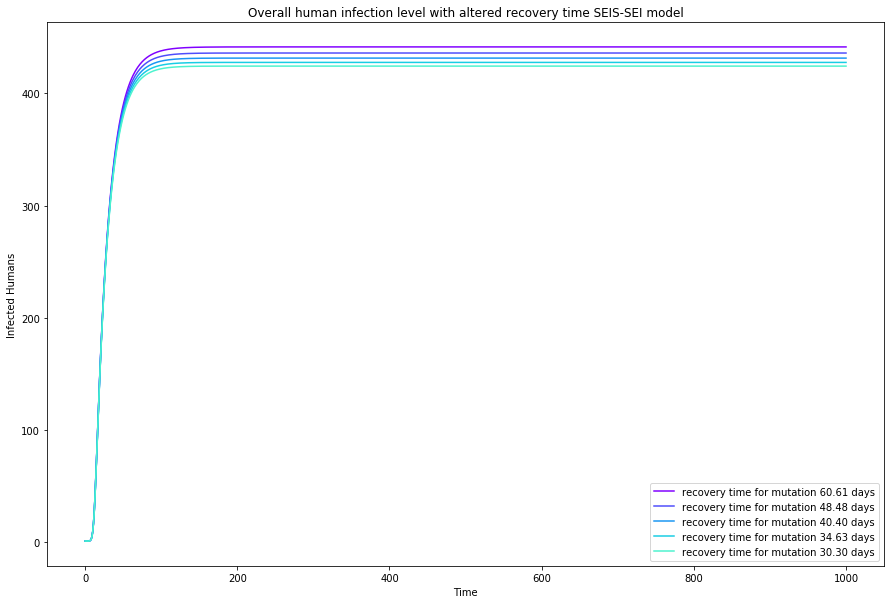

In [11]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_recoveryE[:,6,i]+RES_recoveryE[:,7,i], c=line_colors[i], label='recovery time for mutation {0:.2f} days'.format(1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall human infection level with altered recovery time SEIS-SEI model')
plt.legend()
plt.show()

# Different levels of mutation

In [12]:
m=np.linspace(0,500,11)
RES_m=np.zeros((1001,9,11))

r=0.5;

beta=np.array([[0, 0.2], [0.5, 0.5]]);
sigma=np.array([0.025,0.143])
d=np.array([5.5e-5, 0.05]);
nu=np.array([5.5e-2, 5e2]);
gamma=np.array([0.033, 0,0.0165]);


for i in range(11):
    mutants=m[i]
    Num=1e3-mutants
    X0=np.array([1e3-mutants,mutants, 1e4]);
    Y0=np.array([0,0,0,1,0, 1]);
    ND=MaxTime=1000.0;
    TS=1.0
   
    INPUT=np.hstack((X0,Y0))

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_SI_mut,INPUT,t_range)
    RES_m[:,:,i]=RES_mut

/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/home/susanna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


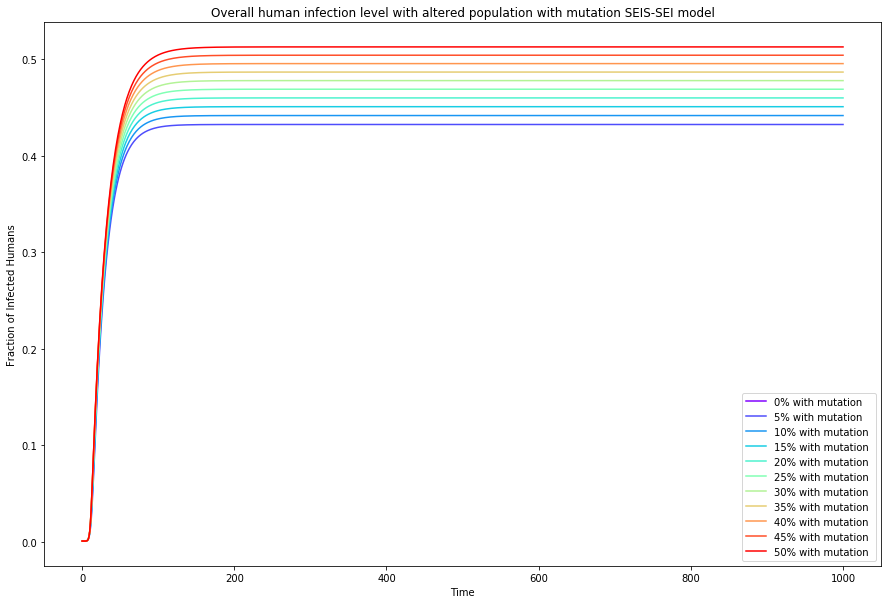

In [13]:
plt.figure(figsize=(15,10))
for i in range(11):
    plt.plot((RES_m[:,6,i]+RES_m[:,7,i])/1e3, c=line_colors[i], label='{0:.0f}% with mutation '.format(m[i]/10))

plt.xlabel('Time')
plt.ylabel('Fraction of Infected Humans')
plt.title('Overall human infection level with altered population with mutation SEIS-SEI model')
plt.legend()
plt.show()

In [270]:
(RES_m[-1,6,10]+RES_m[-1,7,10])-RES_m[-1,6,9]-RES_m[-1,7,9]

9.7229952006580334

In [271]:
dif=np.zeros(10)
for i in range(10):
    dif[i]=((RES_m[-1,6,i+1]+RES_m[-1,7,i+1])-(RES_m[-1,6,i]+RES_m[-1,7,i]))/1e3

In [272]:
dif*100

array([        nan,  1.03538569,  1.02607652,  1.01807803,  1.01033914,
        1.00268799,  0.99507275,  0.98747353,  0.97988449,  0.97229952])

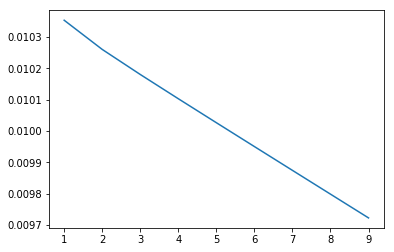

In [273]:
plt.plot(dif)
plt.show()

# Surface plot 

In [6]:
m=np.linspace(1,500,500)
m_recov=1/np.linspace(1/0.033,1/0.0165,11)
RES_m=np.zeros((1001,9,500,11))

r=0.5;

beta=np.array([[0, 0.02], [0.5, 0.5]]);
sigma=np.array([0.1,0.143])
d=np.array([5.5e-5, 0.1]);
nu=np.array([5.5e-2, 1e3]);
#gamma=np.array([0.033, 0,0.0165]);

for j in range(11):
    gamma=np.array([0.033, 0,m_recov[j]]);

    for i in range(500):
        mutants=m[i]
        Num=1e3-mutants
        X0=np.array([1e3-mutants,mutants, 1e4]);
        Y0=np.array([0,0,0,1,0, 1]);
        ND=MaxTime=1000.0;
        TS=1.0

        INPUT=np.hstack((X0,Y0))

        t_start = 0.0; t_end = ND; t_inc = TS
        t_range = np.arange(t_start, t_end+t_inc, t_inc)
        RES_mut = spi.odeint(SEIS_SI_mut,INPUT,t_range)
        RES_m[:,:,i,j]=RES_mut

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [205]:
1/

1000.0

In [8]:
Z=RES_m[1000,6,:,:]+RES_m[1000,7,:,:]


In [85]:
Z=RES_m[1000,6,:,:]+RES_m[1000,7,:,:]

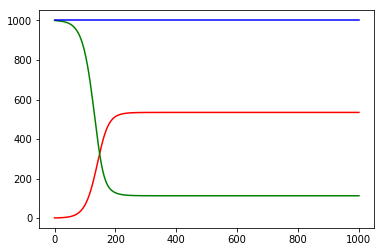

In [139]:
plt.plot(RES_m[:,6,0,0]+RES_m[:,7,0,0],c='r')
plt.plot(RES_m[:,0,0,0]+RES_m[:,1,0,0],c='g')
plt.plot(RES_m[:,6,0,0]+RES_m[:,7,0,0]+RES_m[:,0,0,0]+RES_m[:,1,0,0]+RES_m[:,4,0,0]+RES_m[:,3,0,0],c='b')
plt.show()

In [88]:
Z[0,:]=np.ones(11)*RES_0[1000,4]

In [17]:
m=np.linspace(0,500,11)

/home/susanna/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


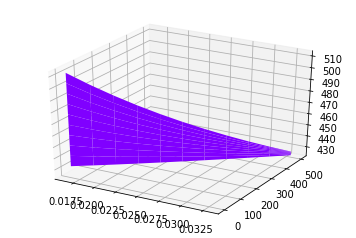

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(m_recov,m,RES_m[1000,6,:,:]+RES_m[1000,7,:,:],cmap='rainbow')
#fig.colorbar(surf, shrink=0.3, aspect=5)
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

plt.show()

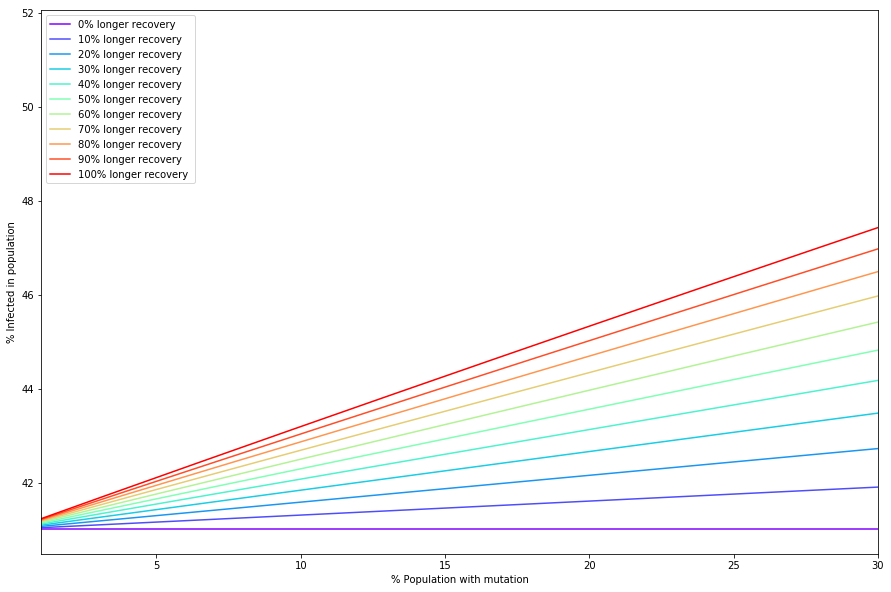

In [13]:
diff_recov=100*((1/m_recov)-(1/0.033))/(1/0.033)
Z=RES_m[1000,6,:,:]+RES_m[1000,7,:,:]
plt.figure(figsize=(15,10))
for i in range(11):
    plt.plot(m/10,Z[:,i]/10,c=line_colors[i],label='{0:.0f}% longer recovery '.format(diff_recov[i]))

plt.legend(loc="upper left")
plt.ylabel('% Infected in population')
plt.xlabel('% Population with mutation')
plt.xlim((1,30))
plt.show()

In [202]:
Z[0,:]

array([ 581.56705396,  581.59022784,  581.61098657,  581.62968772,
        581.64662274,  581.66203235,  581.67611374,  581.68903202,
        581.70092402,  581.71191564,  581.72208653])

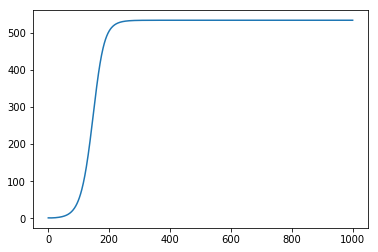

In [79]:
plt.plot(RES_0[:,4])
plt.show()

In [190]:
3e-6/(6e-5)

0.05

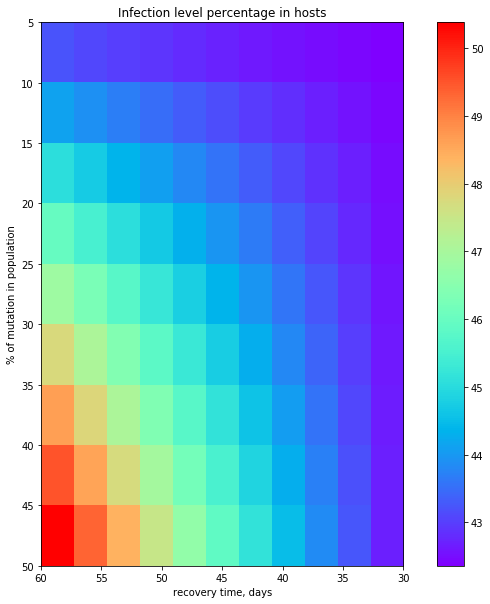

In [303]:

plt.figure(figsize=(12,10))
left = 60
right = 30
bottom = 50
top = 5
extent = [left, right, bottom, top]
cax=plt.imshow(Z/10, cmap='rainbow', interpolation='nearest',extent=extent)
cbar = plt.colorbar(cax)
plt.xlabel('recovery time, days')
plt.ylabel('% of mutation in population')
#plt.clim(0, 1)
plt.title('Infection level percentage in hosts')
plt.show()

In [42]:
diff_recov=100*(0.033-m_recov)/0.033

In [177]:
m_recov=1/np.linspace(1/0.033,1/0.0165,11)

In [178]:
1/np.linspace(1/0.033,1/0.0165,10)

array([ 0.033     ,  0.0297    ,  0.027     ,  0.02475   ,  0.02284615,
        0.02121429,  0.0198    ,  0.0185625 ,  0.01747059,  0.0165    ])

In [182]:
diff_recov=100*((1/m_recov)-(1/0.033))/(1/0.033)

# Change in transmission

In [289]:
mut_transmission=np.linspace(1.0,0.5,5)
RES_transmissionE=np.zeros((1001,9,5))

r=0.5;
mutants=100
Num=900
beta=np.array([[0, 0.2], [0.5, 0.5]]);
sigma=np.array([0.025,0.143])
d=np.array([5.5e-5, 0.025]);
nu=np.array([5.5e-2, 2.5e2]);
X0=np.array([1e3-mutants,mutants, 1e4]);
Y0=np.array([1,0, 1]);
ND=MaxTime=1000.0;
TS=1.0
#alpha=1.0
INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants,mutants, 1e4]);
    Y0=np.array([0,0,0,1,0, 1]);
    ND=MaxTime=1000.0;
    TS=1.0

    INPUT=np.hstack((X0,Y0))
    gamma=np.array([0.033, 0,0.033]);
    beta=np.array([[0, 0.5], [0.8, mut_transmission[i]]]);
    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SEIS_SI_mut,INPUT,t_range)
    RES_transmissionE[:,:,i]=RES_mut

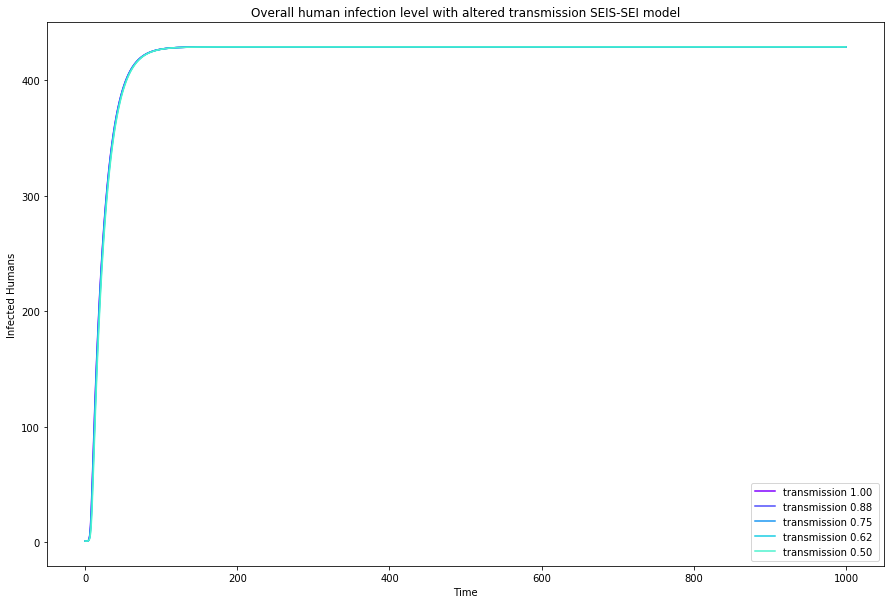

In [292]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.plot(RES_transmissionE[:,6,i]+RES_transmissionE[:,7,i], c=line_colors[i], label='transmission {0:.2f} '.format(mut_transmission[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall human infection level with altered transmission SEIS-SEI model')
plt.legend()
plt.show()

# Old simulations

In [118]:
mut_transmission=np.linspace(0.8,1.0,5)
RES_transmission=np.zeros((1001,6,5))
r=0.5/1e3;
mutants=100
N=900

gamma=np.array([0.033, 0,0.033]);
mu=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
# X0=np.array([1e3-mutants, 1e4]);
# Y0=np.array([1, 1]);
Z0=[mutants,0];
ND=MaxTime=1000.0;
TS=1.0
# alpha=1.0
# INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants, mutants,1e4]);
    Y0=np.array([1,0, 1]);

    ND=MaxTime=1000.0;
    TS=1.0
    beta=np.array([[0, 0.5], [0.8, mut_transmission[i]]]);
    INPUT=np.hstack((X0,Y0))

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SIS_SI_mut,INPUT,t_range)
    RES_transmission[:,:,i]=RES_mut

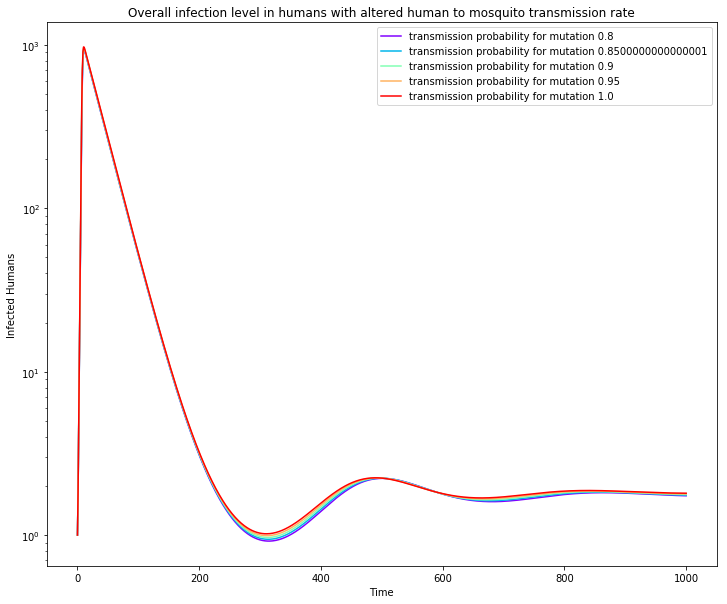

In [119]:
plt.figure(figsize=(12,10))
for i in range(5):
    plt.semilogy(RES_transmission[:,3,i]+RES_transmission[:,4,i], c=line_colors[i], label='transmission probability for mutation {}'.format(mut_transmission[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall infection level in humans with altered human to mosquito transmission rate')
plt.legend()
plt.show()

In [129]:
mut_transmission=np.linspace(0.8,1.0,5)
mut_recovery=np.linspace(0.0165,0.033,5)
RES_T_R=np.zeros((1001,6,5))
r=0.5/1e3;
mutants=100
N=900
#beta=np.array([[0, 0.5], [0.8, 0]]);
gamma=np.array([0.033, 0,0.033]);
mu=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
# X0=np.array([1e3-mutants, 1e4]);
# Y0=np.array([1, 1]);
Z0=[mutants,0];
ND=MaxTime=1000.0;
TS=1.0
# alpha=1.0
# INPUT=np.hstack((X0,Y0))
for i in range(5):
    X0=np.array([1e3-mutants, mutants,1e4]);
    Y0=np.array([1,0, 1]);

    ND=MaxTime=1000.0;
    TS=1.0
    beta=np.array([[0, 0.5], [0.8, mut_transmission[4-i]]]);
    gamma=np.array([0.033, 0,mut_recovery[i]]);
    INPUT=np.hstack((X0,Y0))

    t_start = 0.0; t_end = ND; t_inc = TS
    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES_mut = spi.odeint(SIS_SI_mut,INPUT,t_range)
    RES_T_R[:,:,i]=RES_mut

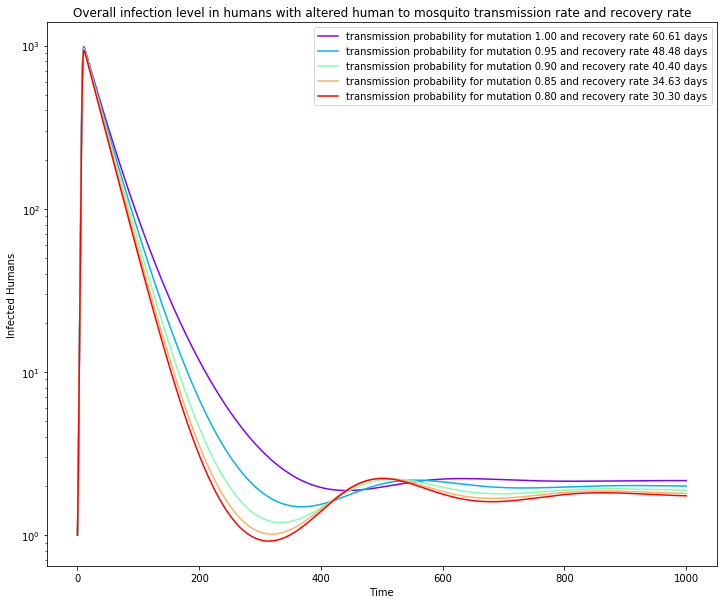

In [130]:
plt.figure(figsize=(12,10))
for i in range(5):
    plt.semilogy(RES_T_R[:,3,i]+RES_T_R[:,4,i], c=line_colors[i], label='transmission probability for mutation {0:.2f} and recovery rate {1:.2f} days'.format(mut_transmission[4-i],1/mut_recovery[i]))

plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.title('Overall infection level in humans with altered human to mosquito transmission rate and recovery rate')
plt.legend()
plt.show()

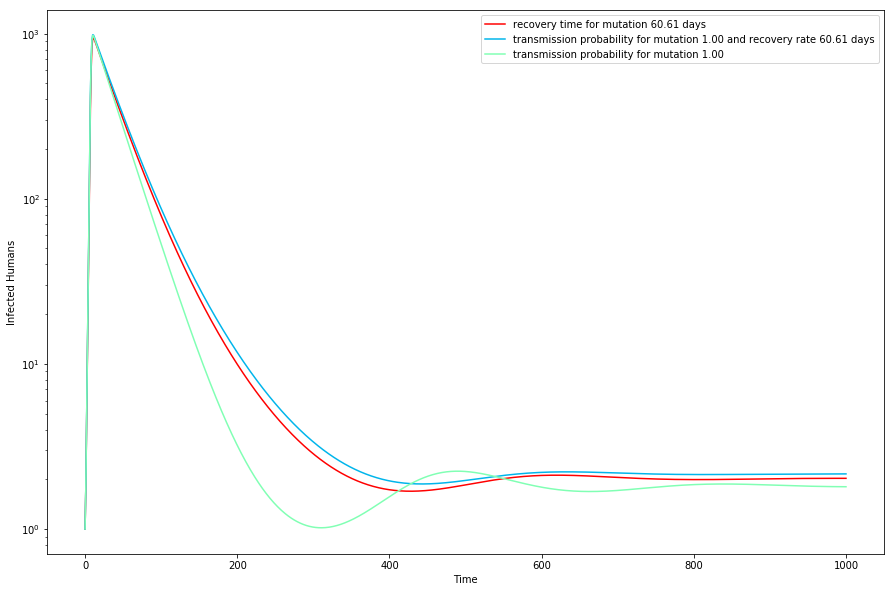

In [131]:
plt.figure(figsize=(15,10))
plt.semilogy(RES_recovery[:,3,0]+RES_recovery[:,4,0], c=line_colors[4], label='recovery time for mutation {0:.2f} days'.format(1/mut_recovery[0]))
plt.semilogy(RES_T_R[:,3,0]+RES_T_R[:,4,0], c=line_colors[1], label='transmission probability for mutation {0:.2f} and recovery rate {1:.2f} days'.format(mut_transmission[4],1/mut_recovery[0]))
plt.semilogy(RES_transmission[:,3,4]+RES_transmission[:,4,4], c=line_colors[2], label='transmission probability for mutation {0:.2f}'.format(mut_transmission[4]))
plt.xlabel('Time')
plt.ylabel('Infected Humans')
plt.legend()
plt.show()